In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
estate=pd.read_excel("D:\\LetsUpgrade\\Day 21\\Linear Regression.xlsx")

In [3]:
estate.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [4]:
estate.tail()

,price,sqft_living,bedrooms,bathrooms,floors
21608,360000,1530,3,2.50,3.0
21609,400000,2310,4,2.50,2.0
21610,402101,1020,2,0.75,2.0
21611,400000,1600,3,2.50,2.0
21612,325000,1020,2,0.75,2.0


In [5]:
estate.shape

(21613, 5)

In [6]:
estate.dtypes

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

In [7]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [8]:
estate.isnull().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F712928FC8>,
      dtype=object)

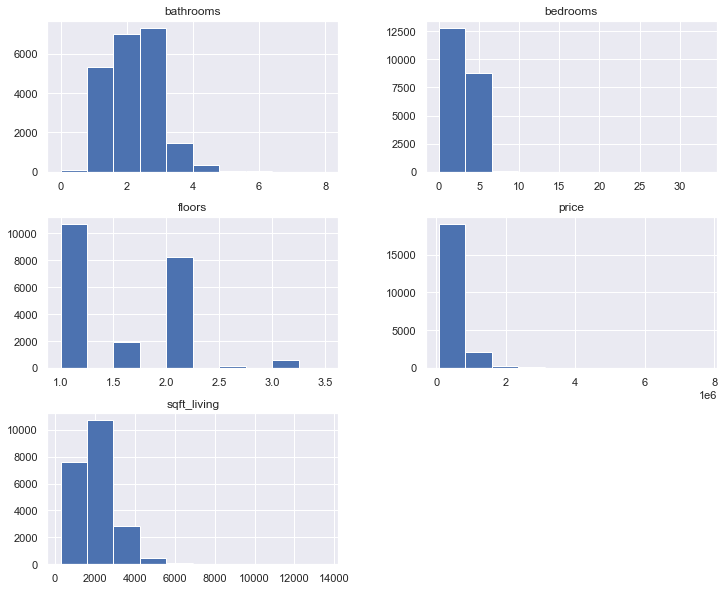

In [9]:
estate.hist(figsize=(12,10))

In [10]:
estate.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


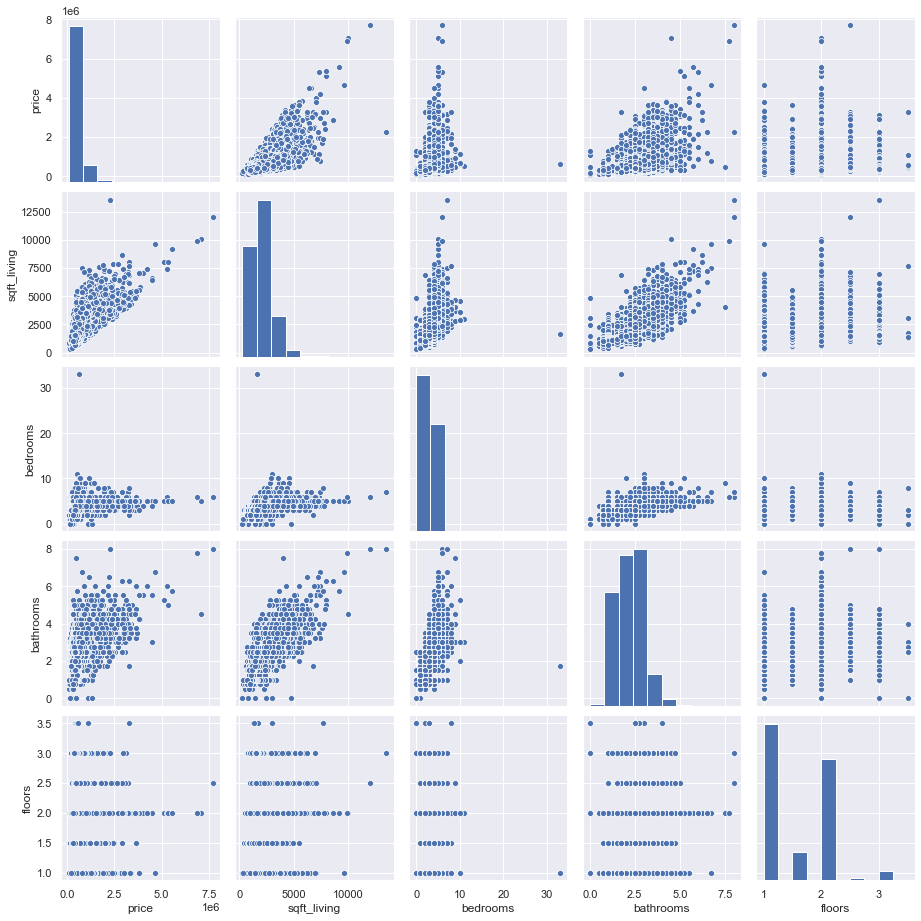

In [11]:
sns.pairplot(estate)

In [12]:
estate.head(1)

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.0,1.0


In [13]:
y=estate.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [14]:
X=estate.iloc[:,1:2]

In [15]:
X.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


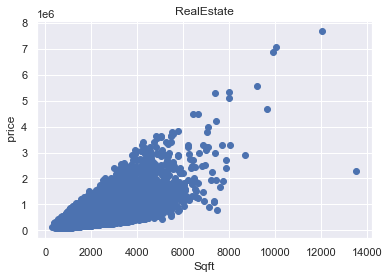

In [16]:
plt.scatter(X,y)
plt.title("RealEstate")
plt.xlabel("Sqft")
plt.ylabel(" price")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [19]:
estate.shape

(21613, 5)

In [20]:
X_train.shape,X_test.shape

((15129, 1), (6484, 1))

In [21]:
y_train.shape,y_test.shape

((15129, 1), (6484, 1))

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
len_reg=LinearRegression()

In [24]:
len_reg.fit(X_train,y_train)

LinearRegression()

In [25]:
# coeff is nothing but slope
len_reg.coef_

array([[278.32860745]])

In [26]:
#intercept is nothing but constant
len_reg.intercept_

array([-37893.59946446])

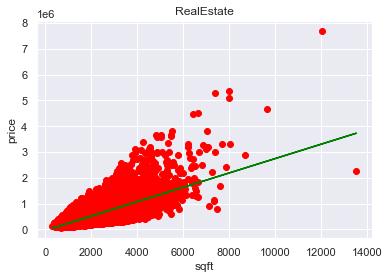

In [27]:
# Visualise training set results
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,len_reg.predict(X_train),color='green')
plt.title("RealEstate")
plt.xlabel("sqft")
plt.ylabel("price")
plt.show()

In [28]:
ypred=len_reg.predict(X_test)

In [29]:
ypred

array([[ 360116.30918286],
       [1261900.99730684],
       [ 362899.59525731],
       ...,
       [ 560512.90654374],
       [ 374032.73955514],
       [ 329500.16236383]])

In [30]:
X_test.head()

,sqft_living
17384,1430
722,4670
2680,1440
18754,1130
14554,3180


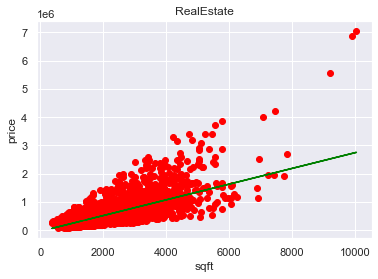

In [31]:
# Visualise testing set results
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,len_reg.predict(X_test),color='green')
plt.title("RealEstate")
plt.xlabel("sqft")
plt.ylabel("price")
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print("The R square Value is", r_square)
print("The RMSE Value is", RMSE)

The R square Value is 0.488899283822523
The RMSE Value is 264896.2296616816


In [34]:
unseen_pred=len_reg.predict(np.array([[1400]]))

print("The unseen value for given x is",unseen_pred)

The unseen value for given x is [[351766.45095949]]
